In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.io as spio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.ndimage import gaussian_filter1d
from sklearn.preprocessing import StandardScaler

In [3]:
sns.set_style('ticks')
sns.set_context('talk')
import warnings; warnings.simplefilter('ignore')

In [4]:
data_dir = '/home/julia/data/ict/'

### Smooth gpmt and rpmt signal

In [6]:
gpmt = np.load(data_dir+"odor_aligned/all_gpmt.npy")
np.save(data_dir+"odor_aligned/gpmt_smooth_100.npy", 
        gaussian_filter1d(gpmt, sigma=100, axis=0, output=np.float64))

In [7]:
rpmt = np.load(data_dir+"odor_aligned/all_rpmt.npy")
np.save(data_dir+"odor_aligned/rpmt_smooth_100.npy", 
       gaussian_filter1d(rpmt, sigma=100, axis=0, output=np.float64))

### Load / define variables

In [5]:
df = pd.read_csv(data_dir+"all_mice.csv", usecols=['dataset', 'type', 'performance', 'day'])

types = ['nogo', 'wait', 'go']
colors = [sns.color_palette('twilight_shifted',10)[i] for i in [-2,-4,2]]
performances = [0,1]

gpmt = np.load(data_dir+"odor_aligned/gpmt_smooth_100.npy")
rpmt = np.load(data_dir+"odor_aligned/rpmt_smooth_100.npy")

### Plot GCaMP signals per mouse and trial type

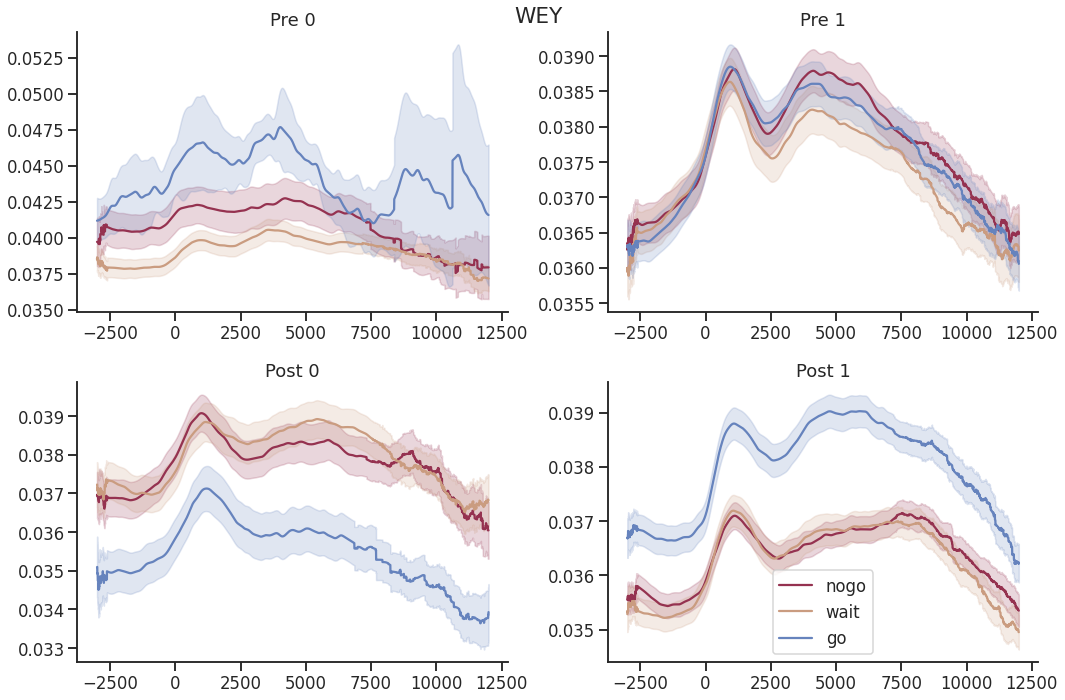

In [13]:
mouse = 'WEY'
days = [range(-7,0), range(0,10)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-3000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[2000:17000]
            sem = stats.sem(gpmt[:,idcs][2000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

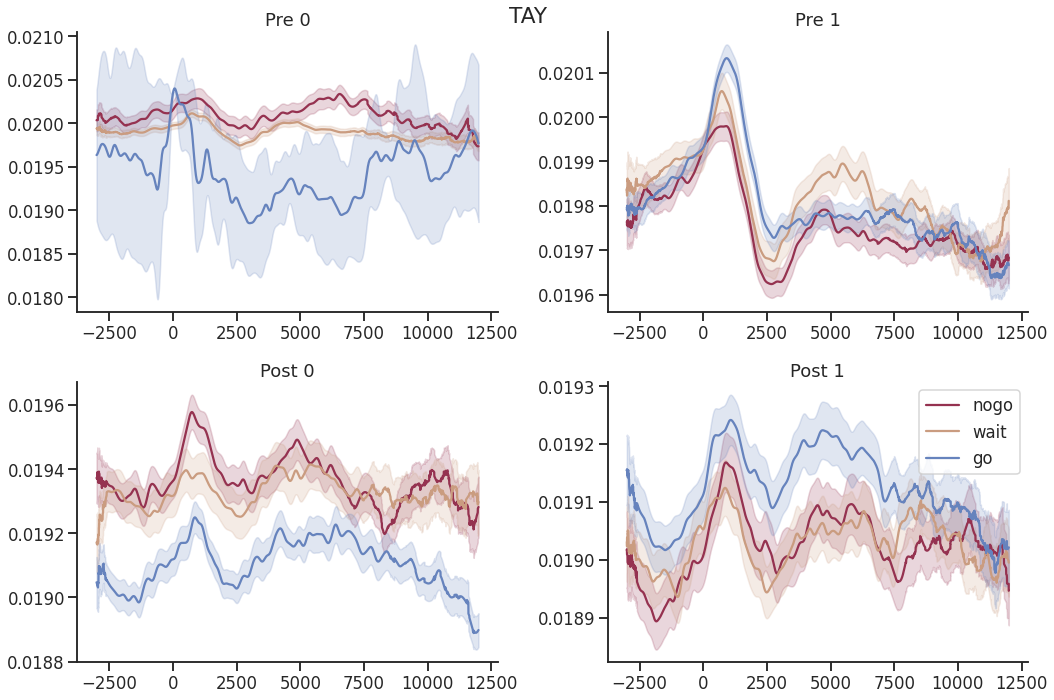

In [14]:
mouse = 'TAY'
days = [range(-7,0), range(0,6)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-3000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[2000:17000]
            sem = stats.sem(gpmt[:,idcs][2000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

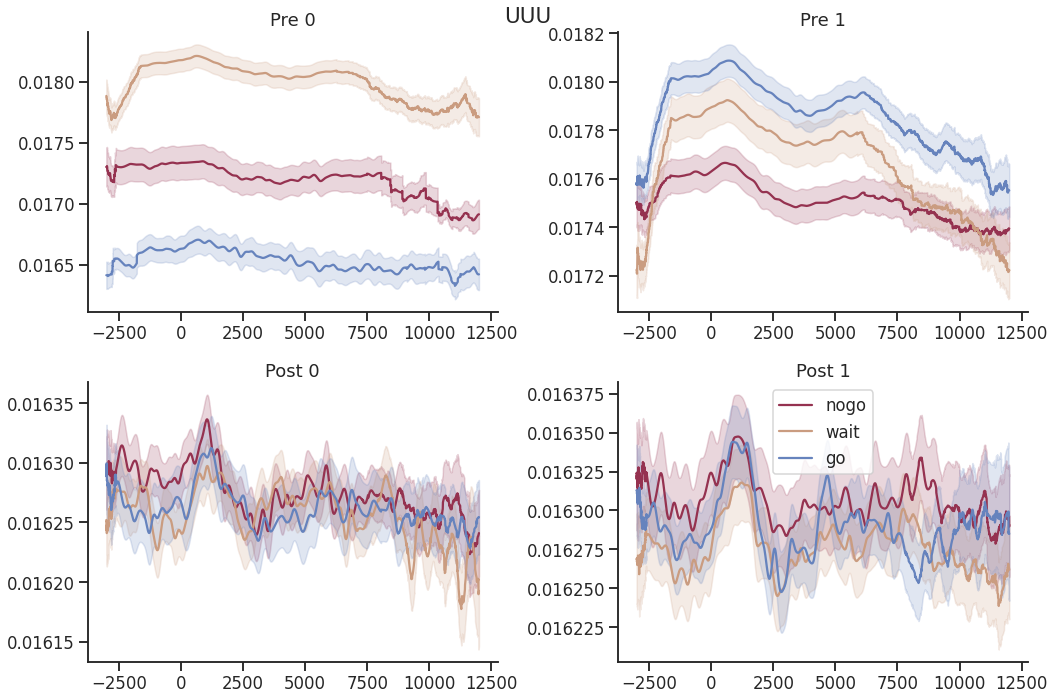

In [15]:
mouse = 'UUU'
days = [range(-11,0), range(0,8)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-3000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[2000:17000]
            sem = stats.sem(gpmt[:,idcs][2000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

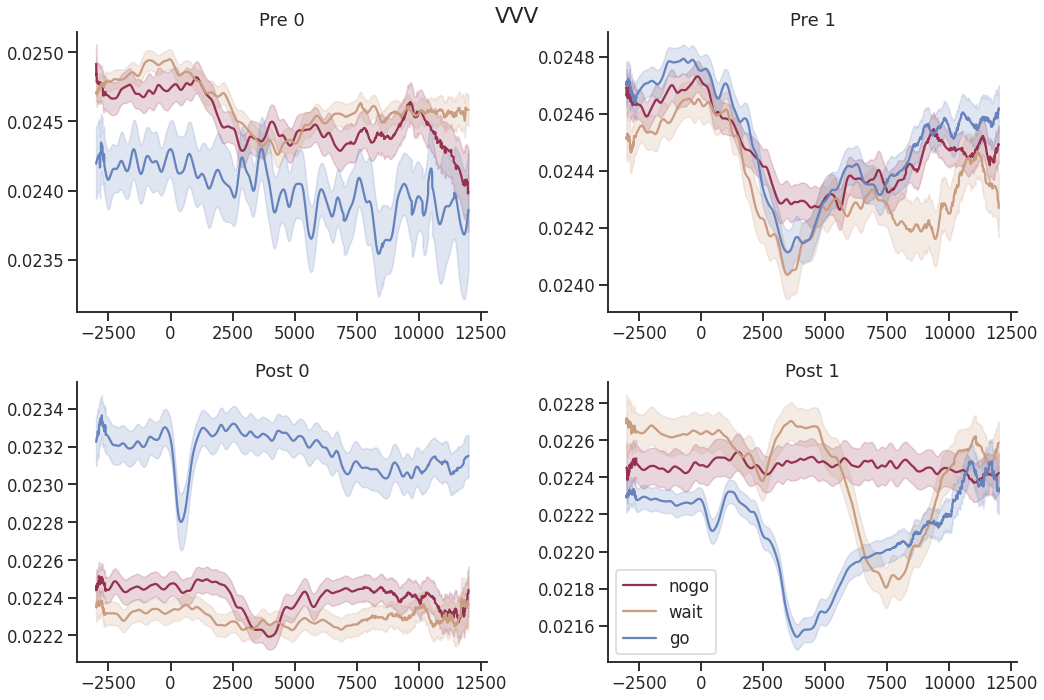

In [16]:
mouse = 'VVV'
days = [range(-5,0), range(0,6)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-3000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[2000:17000]
            sem = stats.sem(gpmt[:,idcs][2000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

## Average across all mice

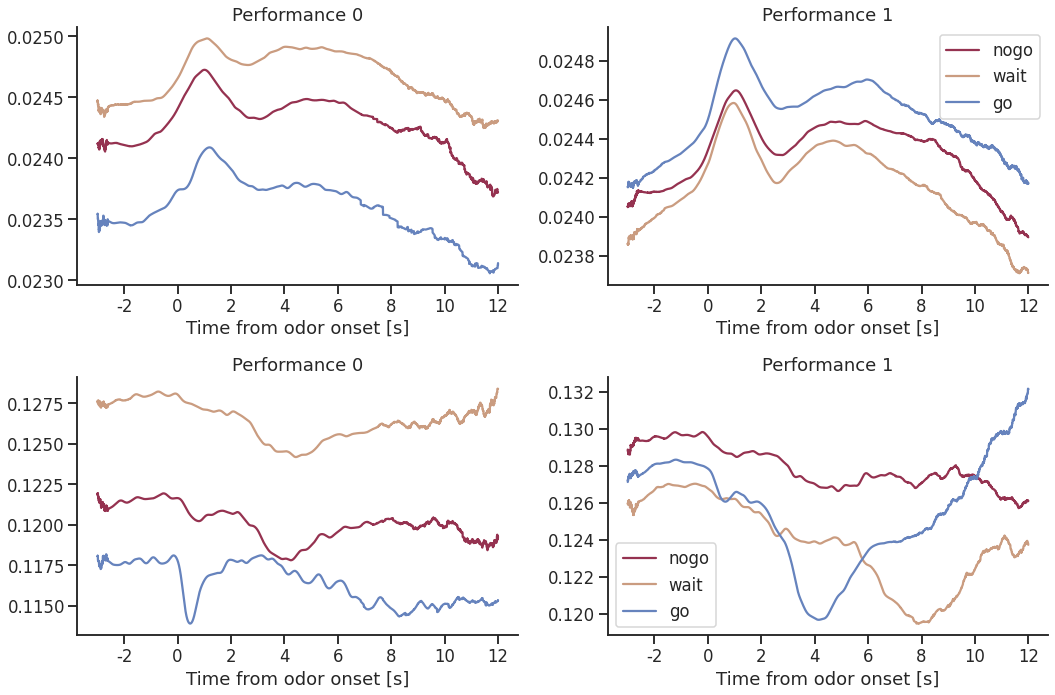

In [20]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
mice = ['TAY', 'UUU', 'VVV', 'WEY']
signal = [gpmt, rpmt]

for s in range(len(signal)):
    for c in range(len(types)):
        for p in performances:

            L = np.zeros((signal[s].shape[0], len(mice)))
            for m in range(len(mice)):
                idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                          (df['dataset'].str.contains(mice[m]))].index
                L[:,m] = np.nanmean(signal[s][:,idcs], axis=1)

            x = np.arange(-3000, 12000)
            y = np.nanmean(L[2000:17000], axis=1)

            ax[s,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[s,p].set_xticks([-2000, 0, 2000, 4000,6000,8000,10000,12000])
            ax[s,p].set_xticklabels([-2,0,2,4,6,8,10,12])
            ax[s,p].set_xlabel('Time from odor onset [s]')
            ax[s,p].set_title('Performance {}'.format(performances[p]))
            sns.despine()

        ax[s,p].legend()
    plt.tight_layout()

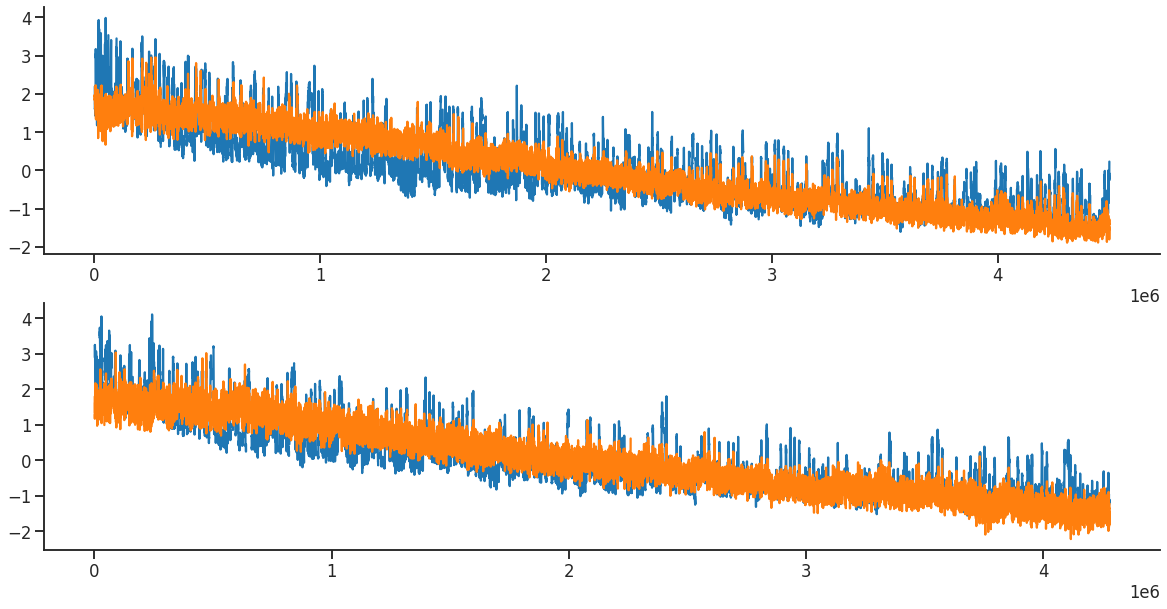

In [10]:
mouse = 'WEY'
#days = [-7, -6, -5]
#days = [-4, -3, -2]
#days = [-1, 0, 1]
#days = [2, 3, 4]
#days = [5, 6, 7]
days = [8, 9,]
#range(-7,10)

fig, ax = plt.subplots(len(days),1, figsize=(20,5*len(days)))
for d in range(len(days)):
    idcs = df[(df['dataset'].str.contains(mouse)) & (df['day']==(days[d]))].index
    for signal in [gpmt, rpmt]:
        values = signal[:,idcs].T.flatten()
        mean = np.nanmean(values)
        std = np.nanstd(values)
        ax[d].plot((values-mean)/std)
    sns.despine()